# Pipeline for Spike sorting algorithms


Most of the work is done in the script file (helper_function.py, feature_extraction.py, visualization.py) and the main.py uses these different functions to cluster signal amplitude into the different spikes that initiated it.  

This notebook is the interactive version of the main.py

Ressource I used:
- https://towardsdatascience.com/using-signal-processing-to-extract-neural-events-in-python-964437dc7c0

- Quian Quiroga R, Nadasdy Z, Ben-Shaul Y. Unsupervised spike detection and sorting with wavelets and superparamagnetic clustering. Neural Comput 16: 1661–1687, 2004. doi:10.1162/089976604774201631. 

- See also new wave_clus implementation: A novel and fully automatic spike sorting implementation with variable number of features. F. J. Chaure, H. G. Rey and R. Quian Quiroga. Journal of Neurophysiology; 2018. https://doi.org/10.1152/jn.00339.2018

In [1]:
import os

import helper_function as hf
import feature_extraction as fe
import visualization as vis

In [2]:
### Downloading and extracting the data.
DATA_DIR = 'data/UCLA_data'
DATA_FILE = 'CSC4.Ncs'
# Data path containing your Neuralynx data.
DATA_PATH = os.path.join(DATA_DIR, DATA_FILE)

try:
    if DATA_FILE not in os.listdir(DATA_DIR):
        raise("No data in the data dir, redownloading it")
except:
    !wget https://leicester.figshare.com/ndownloader/files/20031056 \
        -O data.zip
    !unzip -o data.zip -d ./data

In [3]:
##############
# PARAMETERS #
##############

# Number of cluster (shoud be determined automatically by for example SPC).
N_CLUS = 3

# Window of time (in seconds) to plot some samples of spikes.
T_MIN_MAX = (0, 3)

# 1. Load Data

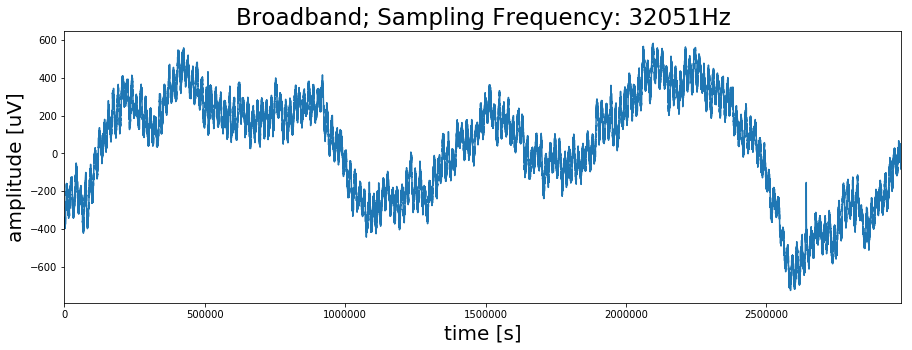

In [4]:
### Load ncs data and return the raw data, the sampling frequency, the amplitude, and the time vector.
raw, sf, amp, time_vec = hf.load_ncs(DATA_PATH)

### Plot the raw signal between time 'T_MIN_MAX[0]' and 'T_MIN_MAX[1]'.
vis.plot_amplitude(time_vec, amp, sf, t_min=T_MIN_MAX[0], t_max=T_MIN_MAX[1])

# 2. Filter Signal

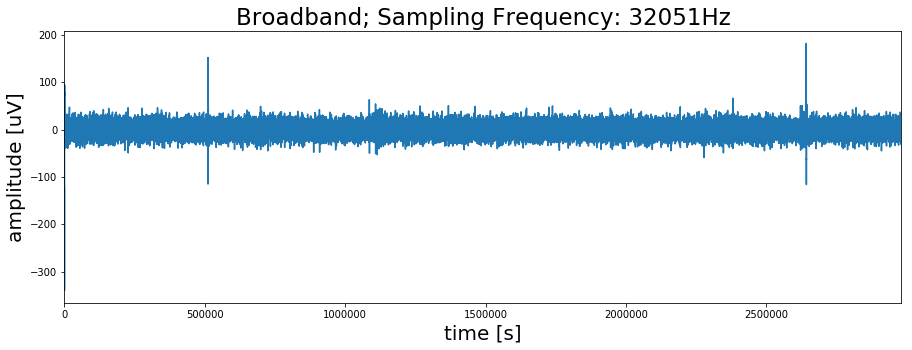

In [5]:
### Filter the amplitude with pass_band butter.
filtered_amp = hf.pass_band_butter(amp, sf)

### Plot the filtered signal between time 'T_MIN_MAX[0]' and 'T_MIN_MAX[1]'.
vis.plot_amplitude(time_vec, filtered_amp, sf, t_min=T_MIN_MAX[0], t_max=T_MIN_MAX[1])

# 3. Spikes Extraction

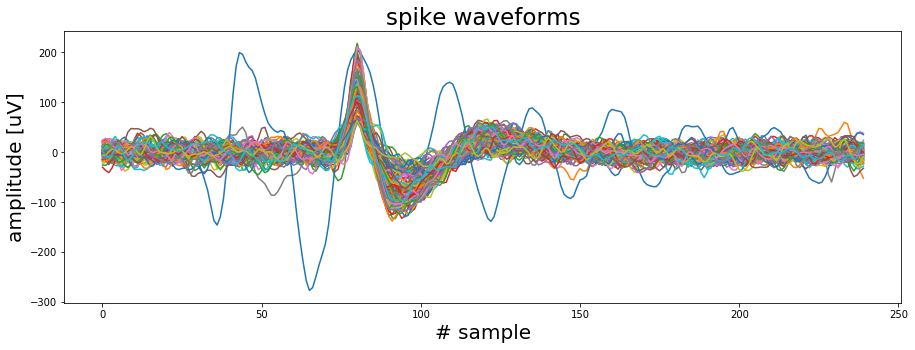

In [6]:
### Exctract spikes from filtered signal and return the position of the spikes maxima and all the wave form around these maxima.
pos, wave_form = hf.extract_spikes(filtered_amp, thresh_mode="quiroga")

### Plot a random subset of the spikes wave_form
vis.plot_random_spikes(wave_form)

# 4. Features extractions from the spikes

In [7]:
### Extract features from spikes.
### Different methods can be used here (PCA, wavelets decomposition and PCA or multimodal selection)
wave_features = fe.dwt_multimodal(wave_form, low_dim=10)

# 5. Spike clustering

In [8]:
### Clusterize those features.
### Different clustering methods cqn be used here (K_means, GMM, DBSCAN)
features_1 = fe.gmm(wave_features, n_clus=N_CLUS)

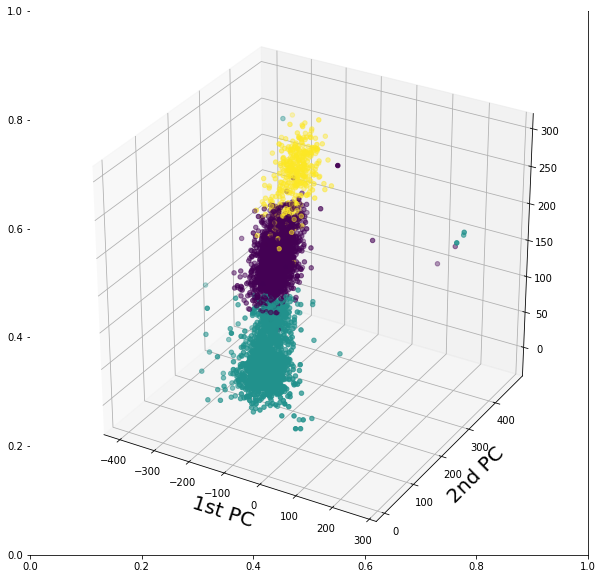

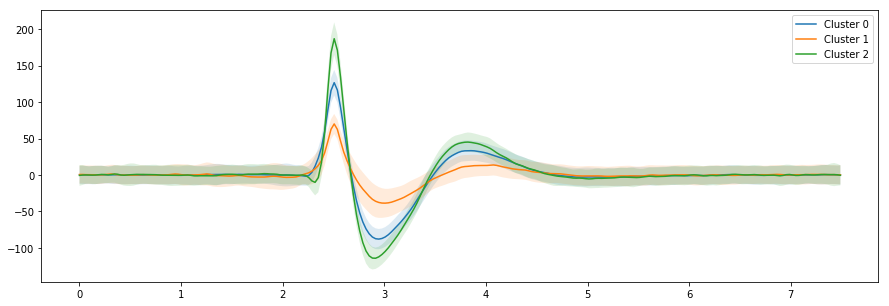

In [9]:
### Plot the cluster map and their average wave form.
vis.plot_features_cluster(wave_form, sf, features_1)